# Boston Housing Price Analysis - Linear Regression

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame.

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Now create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5,1,'Relationship between CRIM and Price')

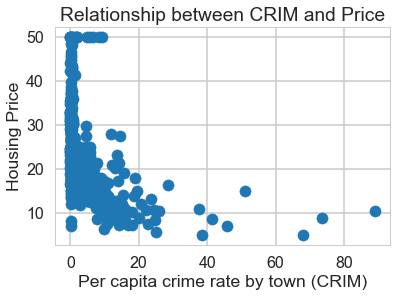

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

#### There is a negative relationship between the crime rate and the housing price, but it's not a linear relationship. What is interesting is that there are some data points where the housing price stays the same while the crime rate increases a little bit. We can't just identify any outliers just by looking at the figure above.

Text(0.5,1,'Relationship between RM and Price')

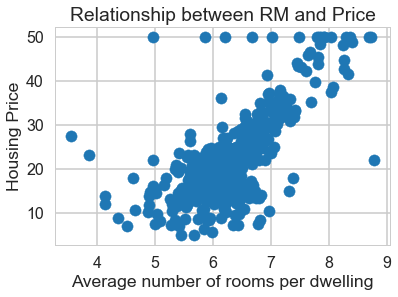

In [13]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

#### The above plot shows that the more rooms per dwelling, the more expensive the house. The relationship between these two variables is positive and linear. There are some outliers. For instance, some houses already have the equally high price when the room number is less than the others.

Text(0.5,1,'Relationship between PTRATIO and Price')

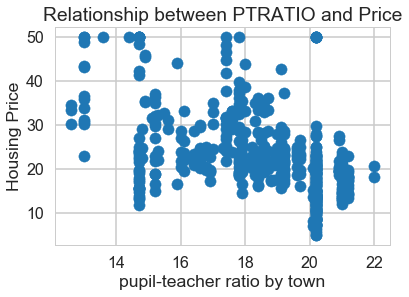

In [14]:
# scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

#### The above plot shows a general downward trend of housing price with increasing pupil-teacher ratio by town. However, even with the same pupil-teaher ratio, the housing price varies a lot.

Text(0.5,1,'Relationship between INDUS and Price')

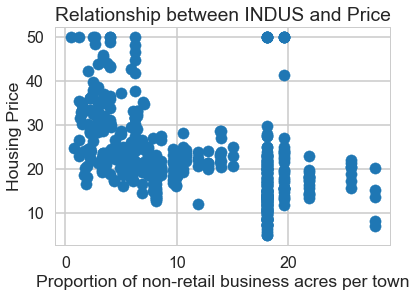

In [15]:
plt.scatter(bos.INDUS, bos.PRICE)
plt.xlabel("Proportion of non-retail business acres per town")
plt.ylabel("Housing Price")
plt.title("Relationship between INDUS and Price")

#### The above plot shows a downward trend of housing price with increasing proportion of non-retail nusiness acres per town. A big proportion of non-retail business acres means there are more manufacturers, companies, or factories, so it might mean that town is not quite a suitable living place.

Text(0.5,1,'Relationship between CHAS and Price')

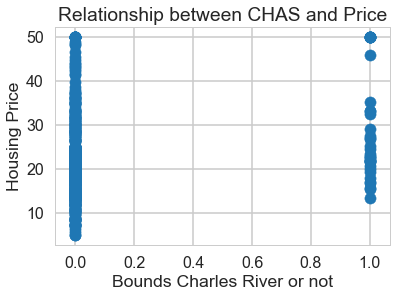

In [16]:
plt.scatter(bos.CHAS, bos.PRICE)
plt.xlabel("Bounds Charles River or not")
plt.ylabel("Housing Price")
plt.title("Relationship between CHAS and Price")

#### It is not very clear what the price distributions look like from the scatter plot, but if the house bounds Charles River, its price is not likely to be too low. It could be better presented by other plots than a scatter plot.

Text(0.5,1,'Relationship between NOX and Price')

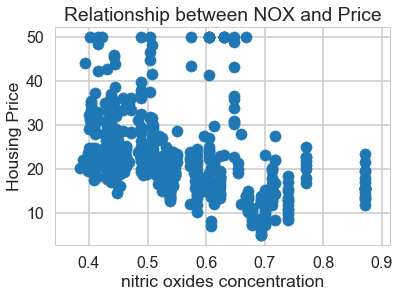

In [17]:
plt.scatter(bos.NOX, bos.PRICE)
plt.xlabel("nitric oxides concentration")
plt.ylabel("Housing Price")
plt.title("Relationship between NOX and Price")

#### The above plot shows a downward trend of the housing price with increasing nitric oxides. It indicates that the farther away the house is from the high way or major traffic, the higher price.

### Scatterplots using Seaborn

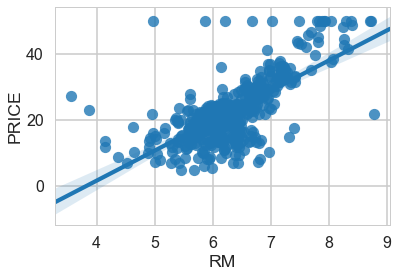

In [18]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


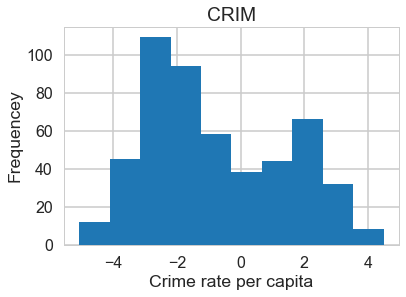

In [19]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

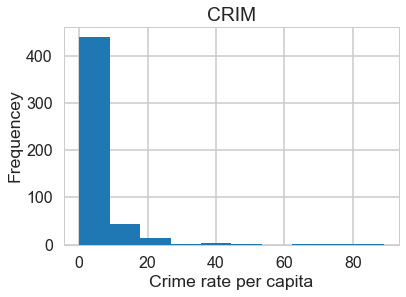

In [20]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

#### The purpose of taking the log is to see a better distribution and comparison of the crime rate per capita in different town. Without taking the log, the scale of the plot will make it hard to see a pattern. We can only tell that most of the towns have very low crime rate. There are very few towns that have higher crime rates. After taking the log, we can clearly see the distribution of frequency, that there are two peaks of the log of crime rate, which is totally a different shape from the other one.

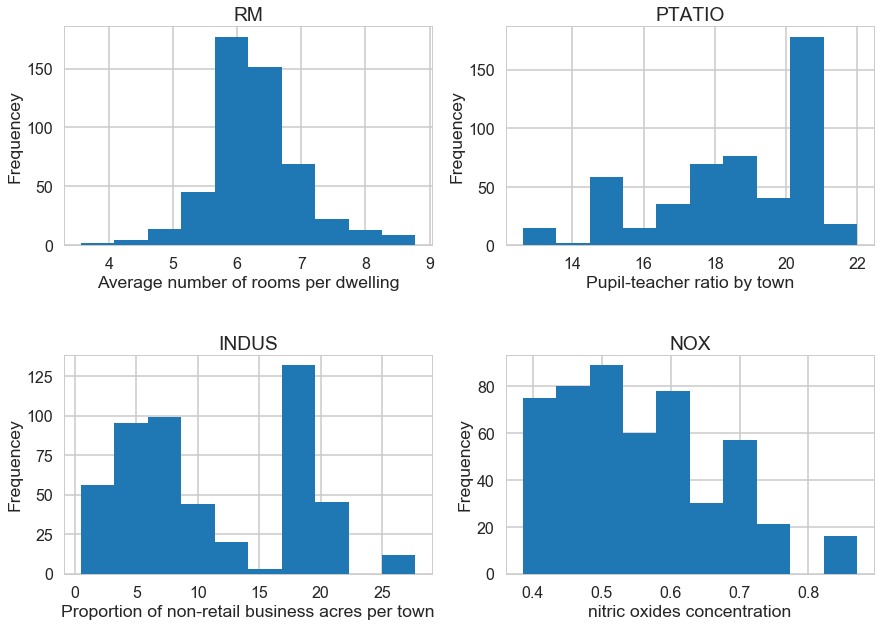

In [21]:
# # Plot the histogram for RM and PTRATIO against each other, along with INDUS and NOX, 
# two variables I picked in the previous section.
plt.subplot(2,2,1)
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Frequencey")

plt.subplot(2,2,2)
plt.hist(bos.PTRATIO)
plt.title("PTATIO")
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Frequencey")

plt.subplot(2,2,3)
plt.hist(bos.INDUS)
plt.title("INDUS")
plt.xlabel("Proportion of non-retail business acres per town")
plt.ylabel("Frequencey")

plt.subplot(2,2,4)
plt.hist(bos.NOX)
plt.title("NOX")
plt.xlabel("nitric oxides concentration")
plt.ylabel("Frequencey")

plt.subplots_adjust(left=0.125, bottom=0.1, right=2, top=2, wspace=0.2, hspace=0.5)

plt.show()

#### It shows that the distribution of average number of rooms per dwelling is similar to a normal distribution. The maximum frequency occurs around 6 rooms per dwelling. The distribution of the pupil-teacher ratio by town looks like a left skewed distribution.

## Part 2: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which I will use to fit a linear regression model and predict Boston housing prices. I will use the least-squares method to estimate the coefficients.  

I'll use two ways of fitting a linear regression. 

### Fitting Linear Regression using `statsmodels`

In [22]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/forheart/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           2.49e-74
Time:                        17:16:31   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

Let's see how the model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

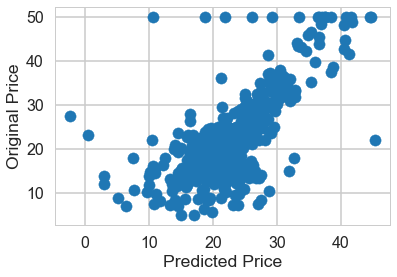

In [24]:
plt.scatter(m.fittedvalues, bos.PRICE)
plt.xlabel('Predicted Price')
plt.ylabel('Original Price')
plt.show()

#### We can see below that there is a ceiling effect. There is a ceiling in the above plot. While the predicted price varies for some houses, the original price actually is the same. Also, for large values of  y  we get underpredictions, most predictions are below the 45-degree gridlines.

### Fitting Linear Regression using `sklearn`


In [25]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [ ]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [26]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
lm.score(X, bos.PRICE)

0.7406426641094094

In [28]:
m1 = ols('bos.PRICE ~ X', bos).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:              bos.PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 09 Mar 2019   Prob (F-statistic):          6.72e-135
Time:                        17:19:18   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [29]:
# In order not to fit an intercept term, the fit_intercept parameter needs to be set to false.
lm2 = LinearRegression(fit_intercept=False)
lm2.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [30]:
lm2.score(X, bos.PRICE)

0.7137381380515404

In [31]:
m2 = ols('bos.PRICE ~ X', bos).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:              bos.PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 09 Mar 2019   Prob (F-statistic):          6.72e-135
Time:                        17:19:28   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

#### I would recommend having an intercept unless there is theoretical reasons to force the regression to go through the origin. When all features (CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT) equal to zero, the price of the house is clearly not zero. So we should keep the intercept in the regression.

#### To satisfy the linear model assumptions, it is not enough that the residuals are normally distributed. Because, even when the residuals are normally distributed, correlations can exist between among the predictor variables, and even multicollinearity does not affect the predictive power but individual predictor variable’s impact on the response variable could be calculated wrongly.

#### It is false to say that "Y must be normally distributed to use linear regression". The normal distribution applies to the distribution of the residuals, or errors, Y-Ŷ. 

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [32]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.4594883850871


In [33]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [34]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [35]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

Text(0,0.5,'Frequency')

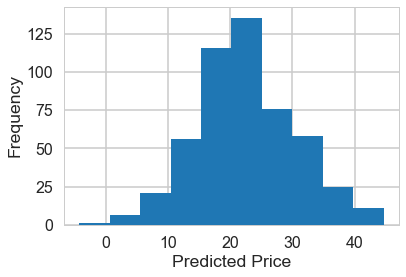

In [36]:
plt.hist(lm.predict(X))
plt.xlabel('Predicted Price')
plt.ylabel('Frequency')

#### The predicted target variable (Price) seems to have a normal distribution. The peak, center, or the most frequent predicted price is between 20-25 in the ablove plot. There are some outliers, because there are even some predicted price is below zero, which clear does not make any sense. We could drop these negative predicted values and make the predicted values zero (even zero house price does not make any sense).

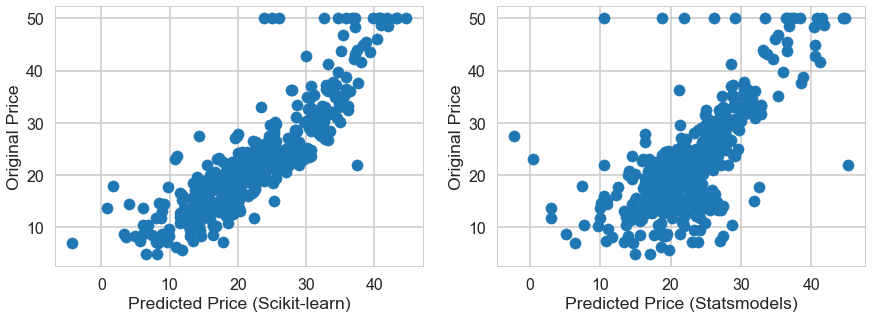

In [37]:
Y_pred = lm.predict(X)
plt.subplot(1,2,1)
plt.scatter(Y_pred, bos.PRICE)
plt.xlabel('Predicted Price (Scikit-learn)')
plt.ylabel('Original Price')

plt.subplot(1,2,2)
plt.scatter(m.fittedvalues, bos.PRICE)
plt.xlabel('Predicted Price (Statsmodels)')
plt.ylabel('Original Price')

plt.subplots_adjust(left=0.125, bottom=0.1, right=2, top=1, wspace=0.2, hspace=0)

plt.show()

#### We can see from the figure on the left that, for houses with original prices lower than 30, the model predicted the price pretty well, so the scatter plot for predicted price less than 30 is in a good linear relationship with the original price. But for houses with price bigger than 30, the curve climbs steeper at this appoint. So the predicted price is lower than the true price for these samples. 

#### The advantages and disadvantages of statsmodels and scikit-learn:

By comparing the two plots above, the advantage of scikit-learn is that for the range that's below a threshold, the predictions are very close to the true values, but beyond this range, the prediction is generally off (underestimation). The advantage of the statsmodels is that, for the whole range of the price, the predicted price is generally around the original price, but there seems to bee more outliers in the whole range than the scikit-learn model. So the scikit-learn model here has lower variance for all data points, but higher bias for part of the predictions. And statsmodels has higher variance, but lower bias for a larger range of predictions.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. 

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [38]:
# Residual Sum-of-Squares
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954979


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [39]:
# Explained Sum-of-Squares
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

1.1058693931495067e-22


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

In [40]:
# Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and 
# the coefficients.
lm2 = LinearRegression()
X1 = bos.PTRATIO.values.reshape(-1,1)
lm2.fit(X1, bos.PRICE)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
lm2.score(X1, bos.PRICE)

0.257847318009223

In [42]:
lm2.intercept_

62.344627474832706

In [43]:
lm2.coef_

array([-2.1571753])

#### The negative coefficient shows a downward trend of the relationship between the pupil-teacher-ratio and the house price. It means when the pupil-teacher-ratio increases by 1, the house price decreases by 2.157. The intercept 62.3 means if the pupil-teacher-ratio is 0, the house price is 62.3, and that's the highest possible price if the pupil-teacher-ratio is the only predictor variable.

#### The R2 value for this simple regression is shown in the lm2.score, so it's 0.258. It tells that there is some linear relationship between the PTRATIO and Price, and this linear model does not explain a lot of the variance in the price.

In [44]:
# Compute the F-statistic

# Number of observations
N = 506

# Number of variables (here we only consider the PTRATIO, so K = 1)
K = 1

# R2
R2 = lm2.score(X1, bos.PRICE)

# F-statistic

F = R2/(1-R2)*(N-K-1)/K

print('The F-statistic is ', F)

The F-statistic is  175.10554287569548


#### The F-statistic tests the overall significance of the regression model. It tests the null hypothesis that if the regression coefficient is equal to zero.

In [45]:
# Get the t-statistic using statsmodels
m3 = ols('bos.PRICE ~ X1', bos).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:              bos.PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           1.61e-34
Time:                        17:21:41   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

#### The F-statistics given here is the same as what we calculated directly from the defination.

In [46]:
# Using the Statsmodels
X2 = bos[['CRIM', 'RM', 'PTRATIO']]
m4 = ols('bos.PRICE ~ X2', bos).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:              bos.PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           6.15e-98
Time:                        17:21:55   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

#### The F-statistic is 244.2, meaning this model definitely provides a better fit to the data than a model that contains no these three variables. The R2 value is 0.593, meaning the model explains about 59.3% of the variability in the response variable. There might be other predictor variables that are not included in the current model.

#### All three variables are significant in predicting house price. But based on the t-values of the coefficients, RM is most significant in predicting the price, followed by the PTRATIO and lastly CRIM. 

## Part 3: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

In [47]:
# Still using the Statsmodels to add two variables, INDUS and Age, to the model we built in Part 3
X3 = bos[['CRIM', 'RM', 'PTRATIO', 'INDUS', 'AGE']]
m5 = ols('bos.PRICE ~ X3', bos).fit()
print(m5.summary())

                            OLS Regression Results                            
Dep. Variable:              bos.PRICE   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     156.8
Date:                Sat, 09 Mar 2019   Prob (F-statistic):          5.64e-100
Time:                        17:22:22   Log-Likelihood:                -1601.6
No. Observations:                 506   AIC:                             3215.
Df Residuals:                     500   BIC:                             3241.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0666      4.025     -0.017      0.9

In [48]:
# Calculate the RSS of the reduced model m4.
RSS_r = np.sum((bos.PRICE - m4.fittedvalues) ** 2)
# Calculate the RSS of the full model m5.
RSS_f = np.sum((bos.PRICE - m5.fittedvalues) ** 2)
# Degree of freedom of the reduced model m4.
DF_r = 502
# Degree of freedom of the full model m5.
DF_f = 500

# The F-statistic to compare these two nested models m4 and m5.
F_nested = (RSS_r - RSS_f)/(DF_r - DF_f)/(RSS_f/DF_f)

F_nested

10.448846464928474

#### The R2 for the full model is 0.61 and that for the reduced model is 0.593. Since the F ratio is much greater than 1, and the p value is low, it means that it's not by chance that we randomly obtain data that fits the full model better. This indicated that the full model is better.


## Part 4: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


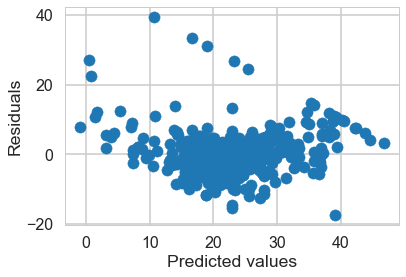

In [49]:
# Construct a fitted values versus residuals plot
residual = bos.PRICE - m4.fittedvalues 
plt.scatter(m4.fittedvalues, residual)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

#### The plot does not show a good random pattern of the residuals. There is a straight line at the top right of the plot, and the rest of the residuals have formed a U-shaped curve.

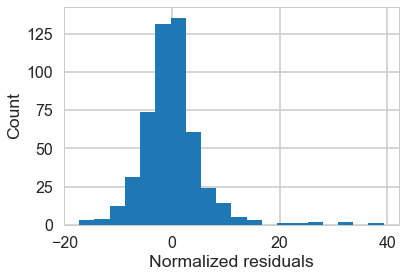

In [50]:
# Take a look at the residuals
plt.hist(residual, bins=20)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
plt.show()

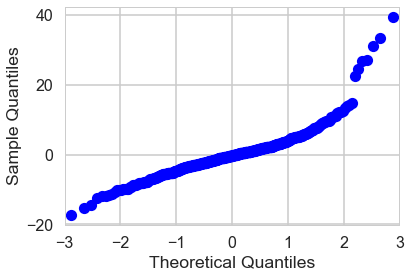

In [51]:
# Construct a quantile plot of the residuals
import pylab
sm.qqplot(residual)
pylab.show()

#### The quantile plot of the residuals indicated that the distribution of the residuals does not follow a normal distribution. So the model created in part 3 is not a good linear model.

In [52]:
# What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

#### The advantages of the fitted vs. residual plot is very useful because if we see a rectangular cloud with no discernible trend or pattern, we should be alert if linear regression applies. So a trend would indicate non-linearities n the data. A quantile plot is also very straightforward in diagnosing linearities, if we plot the ordered residual versus theoretical quantiles, we should get approximately a straight line. Another advantage of the quantile residual plot is that we can find where the residuals are larger or smaller than expected. 

In [53]:
# Identify any outliers (if any) in your model and write a story describing what these outliers might represent.
# Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for 
# the high leverage points.

In [54]:
from statsmodels.graphics.regressionplots import *

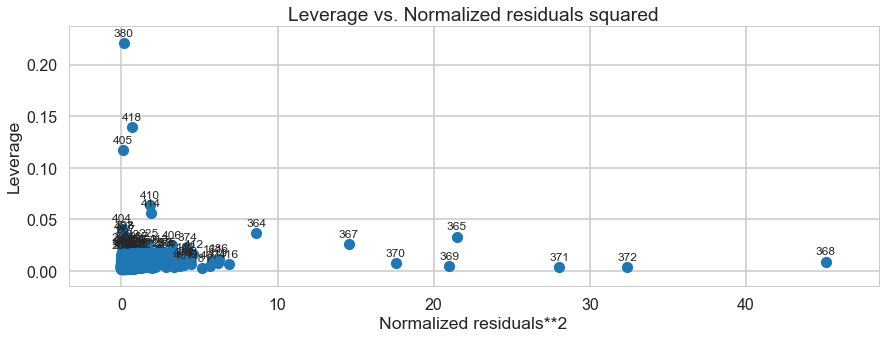

In [55]:
plot_leverage_resid2(m4)
plt.subplots_adjust(left=0.125, bottom=0.1, right=2, top=1, wspace=0, hspace=0)
plt.show()

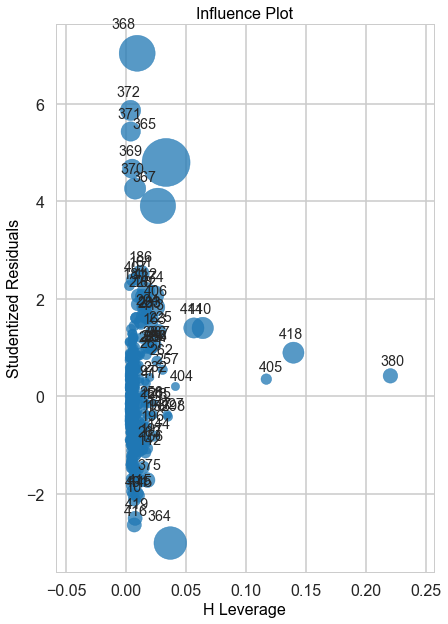

In [56]:
influence_plot(m4)
plt.subplots_adjust(left=0.125, bottom=0.1, right=1, top=2, wspace=0, hspace=0)
plt.show()

#### The outliers are observations with large residuals. As shown in the plot above, the plots that are spreaded on the right side are outliers. There are also data points with large leverages, for example, points 380, 418, 405, 410, and 414.

<Container object of 3 artists>

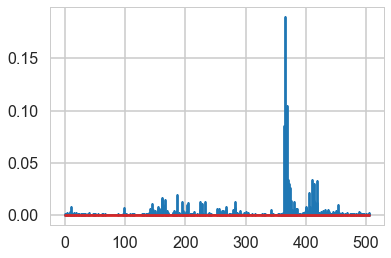

In [57]:
influence = m4.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

#### Cook's distance is to calculate how far the predicted values for your data would move if the model were fit without the data point in question. So we have to look at those data points between 360-380 and 400-420. 

In [58]:
# Take a look at the high leverage points 380, 418, 405, 410, and 414 and compare these houses with the info obtained with bos.describe()
bos.iloc[[380, 405, 410, 414, 418]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8


In [59]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### The high leverage points are those observations far from the mean of the variable, so these points can have an effect on the estimate of the regression coefficients. As shown in the comparison above, these data points have unreasonably high crime rate (45-73 vs the 75% percentile of 3.65). That's why these data points have such high leverages. 

In [60]:
# Take a look at the outlier points
bos.iloc[364:372]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
364,3.47428,0.0,18.1,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
366,3.69695,0.0,18.1,0.0,0.718,4.963,91.4,1.7523,24.0,666.0,20.2,316.03,14.00,21.9
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0


In [61]:
m4.fittedvalues.iloc[364:372]

364    39.112383
365     0.372333
366    10.895715
367     0.763471
368    10.701164
369    23.185628
370    25.465239
371    19.008840
dtype: float64

#### The comparison above shows that the model significantly under-predicted the price of these houses. The model only used three parameters, CRIM, RM and PTRATIO, and ignored other parameters. The reason could be the price of these houses are significantly influenced by other parameters listed here. Or for those luxury and affluent district, one just cannot use a linear model to predict the prices.

In [63]:
# Remove the outliers and high leverage points from the model and run the regression again. 

In [64]:
bos_1 = bos.drop([364, 365, 367, 368, 369, 370, 371, 372, 380, 405, 410, 414, 418])

In [65]:
X3 = bos_1[['CRIM', 'RM', 'PTRATIO']]

In [66]:
m6 = ols('bos_1.PRICE ~ X3', bos_1).fit()
print(m6.summary())

                            OLS Regression Results                            
Dep. Variable:            bos_1.PRICE   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     445.1
Date:                Sat, 09 Mar 2019   Prob (F-statistic):          2.34e-139
Time:                        17:24:36   Log-Likelihood:                -1445.8
No. Observations:                 493   AIC:                             2900.
Df Residuals:                     489   BIC:                             2916.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.1148      3.261     -2.795      0.0

#### The R2 improves a lot after we remove some of the outliers and high leveraged points.